## ADAM

In [1]:
import os    
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:8"

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

# Settings and Dataset

In [4]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [6]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


In [7]:
 class MLPNet(nn.Module):
      def __init__(self):
         super(MLPNet, self).__init__()
         self.fc1 = nn.Linear(784, 256)
         self.fc2 = nn.Linear(256, 256)
         self.fc3 = nn.Linear(256, 10)
         
      def forward(self, x):
         x = x.view(-1, 28*28)
         x = F.relu(self.fc1(x))
         x = F.relu(self.fc2(x))
         x = self.fc3(x)
         return x
         
      def name(self):
         return "MLP"

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.2969
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.2286
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3111
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.1688
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.0877
Epoch: 001/050 | Train: 96.98% | Validation: 96.98%
Time elapsed: 0.05 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1102
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.1587
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1074
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.0554
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.0917
Epoch: 002/050 | Train: 98.31% | Validation: 97.65%
Time elapsed: 0.10 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.0700
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0727
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0435
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0861
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.0393
Epoch: 003/050 | Train: 98.34% | Validation: 97.53%
Time elapsed: 0.16 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.1102
Epoch: 

Epoch: 027/050 | Batch 0050/0210 | Loss: 0.0006
Epoch: 027/050 | Batch 0100/0210 | Loss: 0.0035
Epoch: 027/050 | Batch 0150/0210 | Loss: 0.0193
Epoch: 027/050 | Batch 0200/0210 | Loss: 0.0027
Epoch: 027/050 | Train: 99.69% | Validation: 97.87%
Time elapsed: 1.37 min
Epoch: 028/050 | Batch 0000/0210 | Loss: 0.0038
Epoch: 028/050 | Batch 0050/0210 | Loss: 0.0062
Epoch: 028/050 | Batch 0100/0210 | Loss: 0.0058
Epoch: 028/050 | Batch 0150/0210 | Loss: 0.0202
Epoch: 028/050 | Batch 0200/0210 | Loss: 0.0021
Epoch: 028/050 | Train: 99.84% | Validation: 98.03%
Time elapsed: 1.42 min
Epoch: 029/050 | Batch 0000/0210 | Loss: 0.0067
Epoch: 029/050 | Batch 0050/0210 | Loss: 0.0000
Epoch: 029/050 | Batch 0100/0210 | Loss: 0.0036
Epoch: 029/050 | Batch 0150/0210 | Loss: 0.0004
Epoch: 029/050 | Batch 0200/0210 | Loss: 0.0341
Epoch: 029/050 | Train: 99.73% | Validation: 97.75%
Time elapsed: 1.47 min
Epoch: 030/050 | Batch 0000/0210 | Loss: 0.0077
Epoch: 030/050 | Batch 0050/0210 | Loss: 0.0003
Epoch: 

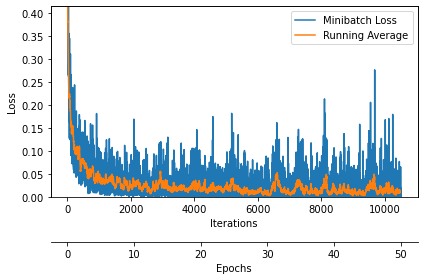

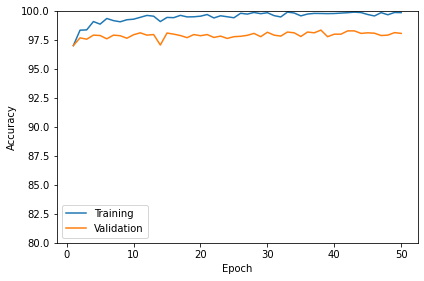

In [8]:
torch.manual_seed(RANDOM_SEED)
model = MLPNet()

model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

## RMSprop

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.2969
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.3876
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3587
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.2136
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1824
Epoch: 001/050 | Train: 94.51% | Validation: 94.90%
Time elapsed: 0.05 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.2352
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.2033
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1066
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1093
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1734
Epoch: 002/050 | Train: 96.11% | Validation: 95.88%
Time elapsed: 0.10 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.1297
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0956
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2172
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.1775
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.1032
Epoch: 003/050 | Train: 97.02% | Validation: 96.50%
Time elapsed: 0.15 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0871
Epoch: 

Epoch: 027/050 | Batch 0050/0210 | Loss: 0.0119
Epoch: 027/050 | Batch 0100/0210 | Loss: 0.0297
Epoch: 027/050 | Batch 0150/0210 | Loss: 0.0040
Epoch: 027/050 | Batch 0200/0210 | Loss: 0.0385
Epoch: 027/050 | Train: 98.78% | Validation: 96.98%
Time elapsed: 1.33 min
Epoch: 028/050 | Batch 0000/0210 | Loss: 0.0702
Epoch: 028/050 | Batch 0050/0210 | Loss: 0.0364
Epoch: 028/050 | Batch 0100/0210 | Loss: 0.1279
Epoch: 028/050 | Batch 0150/0210 | Loss: 0.0075
Epoch: 028/050 | Batch 0200/0210 | Loss: 0.0139
Epoch: 028/050 | Train: 99.21% | Validation: 97.33%
Time elapsed: 1.38 min
Epoch: 029/050 | Batch 0000/0210 | Loss: 0.0289
Epoch: 029/050 | Batch 0050/0210 | Loss: 0.0125
Epoch: 029/050 | Batch 0100/0210 | Loss: 0.0129
Epoch: 029/050 | Batch 0150/0210 | Loss: 0.0704
Epoch: 029/050 | Batch 0200/0210 | Loss: 0.0572
Epoch: 029/050 | Train: 99.19% | Validation: 97.08%
Time elapsed: 1.43 min
Epoch: 030/050 | Batch 0000/0210 | Loss: 0.0786
Epoch: 030/050 | Batch 0050/0210 | Loss: 0.0467
Epoch: 

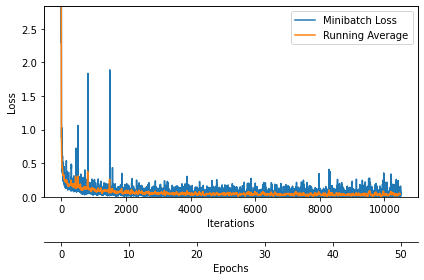

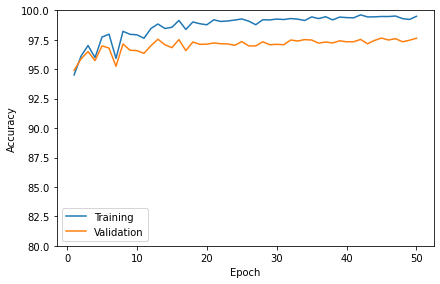

In [9]:


torch.manual_seed(RANDOM_SEED)
model = MLPNet()

model = model.to(DEVICE)

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False, foreach=None)


minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

## SGD

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.2969
Epoch: 001/050 | Batch 0050/0210 | Loss: 1.6612
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.8030
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.5069
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.4268
Epoch: 001/050 | Train: 88.41% | Validation: 90.97%
Time elapsed: 0.05 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.4345
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.3928
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.2879
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.3670
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.3528
Epoch: 002/050 | Train: 90.82% | Validation: 92.77%
Time elapsed: 0.10 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.3078
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.2767
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2620
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.3000
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.2575
Epoch: 003/050 | Train: 92.39% | Validation: 93.73%
Time elapsed: 0.15 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.2622
Epoch: 

Epoch: 027/050 | Batch 0050/0210 | Loss: 0.0342
Epoch: 027/050 | Batch 0100/0210 | Loss: 0.0384
Epoch: 027/050 | Batch 0150/0210 | Loss: 0.0392
Epoch: 027/050 | Batch 0200/0210 | Loss: 0.0414
Epoch: 027/050 | Train: 99.16% | Validation: 98.05%
Time elapsed: 1.32 min
Epoch: 028/050 | Batch 0000/0210 | Loss: 0.0145
Epoch: 028/050 | Batch 0050/0210 | Loss: 0.0266
Epoch: 028/050 | Batch 0100/0210 | Loss: 0.0373
Epoch: 028/050 | Batch 0150/0210 | Loss: 0.0315
Epoch: 028/050 | Batch 0200/0210 | Loss: 0.0204
Epoch: 028/050 | Train: 99.30% | Validation: 97.98%
Time elapsed: 1.37 min
Epoch: 029/050 | Batch 0000/0210 | Loss: 0.0399
Epoch: 029/050 | Batch 0050/0210 | Loss: 0.0263
Epoch: 029/050 | Batch 0100/0210 | Loss: 0.0172
Epoch: 029/050 | Batch 0150/0210 | Loss: 0.0479
Epoch: 029/050 | Batch 0200/0210 | Loss: 0.0483
Epoch: 029/050 | Train: 99.31% | Validation: 98.08%
Time elapsed: 1.41 min
Epoch: 030/050 | Batch 0000/0210 | Loss: 0.0229
Epoch: 030/050 | Batch 0050/0210 | Loss: 0.0313
Epoch: 

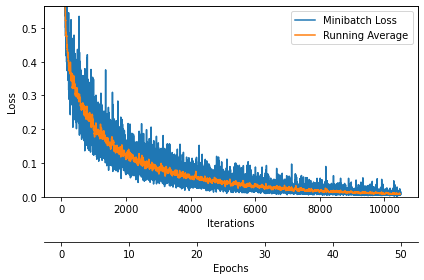

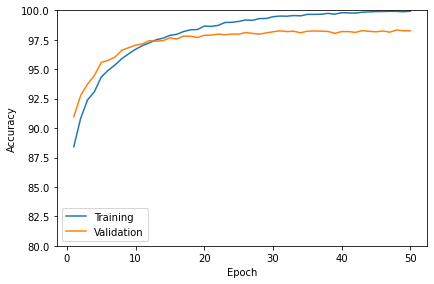

In [10]:
torch.manual_seed(RANDOM_SEED)
model = MLPNet()

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='min',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

## SGD with Momentum

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.2969
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.3770
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3826
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.2484
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1650
Epoch: 001/050 | Train: 94.88% | Validation: 95.60%
Time elapsed: 0.05 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1668
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.1813
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1418
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1107
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1011
Epoch: 002/050 | Train: 97.62% | Validation: 97.45%
Time elapsed: 0.10 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.1206
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0944
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0616
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.1162
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.0672
Epoch: 003/050 | Train: 97.82% | Validation: 97.22%
Time elapsed: 0.15 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0851
Epoch: 

Epoch: 027/050 | Batch 0050/0210 | Loss: 0.0018
Epoch: 027/050 | Batch 0100/0210 | Loss: 0.0034
Epoch: 027/050 | Batch 0150/0210 | Loss: 0.0022
Epoch: 027/050 | Batch 0200/0210 | Loss: 0.0042
Epoch: 027/050 | Train: 100.00% | Validation: 98.40%
Time elapsed: 1.34 min
Epoch: 028/050 | Batch 0000/0210 | Loss: 0.0015
Epoch: 028/050 | Batch 0050/0210 | Loss: 0.0021
Epoch: 028/050 | Batch 0100/0210 | Loss: 0.0023
Epoch: 028/050 | Batch 0150/0210 | Loss: 0.0026
Epoch: 028/050 | Batch 0200/0210 | Loss: 0.0018
Epoch: 028/050 | Train: 100.00% | Validation: 98.40%
Time elapsed: 1.38 min
Epoch: 029/050 | Batch 0000/0210 | Loss: 0.0029
Epoch: 029/050 | Batch 0050/0210 | Loss: 0.0023
Epoch: 029/050 | Batch 0100/0210 | Loss: 0.0015
Epoch: 029/050 | Batch 0150/0210 | Loss: 0.0019
Epoch: 029/050 | Batch 0200/0210 | Loss: 0.0039
Epoch: 029/050 | Train: 100.00% | Validation: 98.40%
Time elapsed: 1.43 min
Epoch: 030/050 | Batch 0000/0210 | Loss: 0.0023
Epoch: 030/050 | Batch 0050/0210 | Loss: 0.0026
Epoc

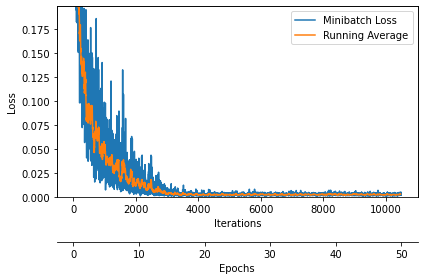

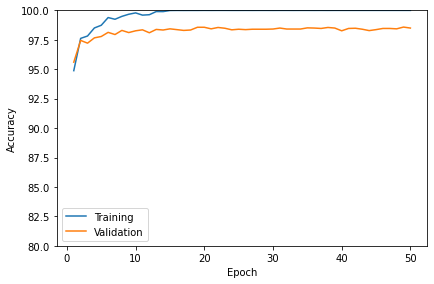

In [11]:
torch.manual_seed(RANDOM_SEED)
model = MLPNet()

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='min',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()